In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 16.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import tokenize
import spacy

# import required packages
import json

# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy

import spacy.cli
spacy.cli.download("en_core_web_lg")

nlp = spacy.load("en_core_web_lg")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Text Processing

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df = pd.read_csv("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320.csv")

In [ ]:
df_msg = df[['MsgBody']]
df_detail = df.drop(['MsgBody'], axis=1)

In [ ]:
df_msg

,MsgBody
0,'>ed it by having it write a poem in Spanish. ...
1,'LOL. I was just going to reply stating how th...
2,'go to https://chat.openai.com/auth/login This...
3,'But how exactly would someone really know tha...
4,'I asked it to do matrix multiplication and Im...
...,...
4869,'u trolling?'
4870,'Variations on this question can give less har...
4871,'nice way to get around ChatGPTâ€™s â€œsorry I...
4872,'This is exactly what happened with me. I want...


In [ ]:
df_detail

,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit
0,'j6wd8m5','2023-02-02 03:31:21','msssingh206','100jw27','How you can bypass AI detection','j2j424u','/r/ChatGPT/comments/100jw27/how_you_can_bypas...,ChatGPT
1,'j6yaz4s','2023-02-02 12:21:23','kZard','102j28c','The pain() function','j2u32ga','/r/ChatGPT/comments/102j28c/the_pain_function...,ChatGPT
2,'j6y10km','2023-02-02 11:19:22','Thedad_','102nymy','Anyone else getting an error message like this?','-','/r/ChatGPT/comments/102nymy/anyone_else_getti...,ChatGPT
3,'j6vucvj','2023-02-01 23:16:02','VidyaTheOneAndOnly','102sh6w','Copyright issues for a novel written by chat ...,'j66hngr','/r/ChatGPT/comments/102sh6w/copyright_issues_...,ChatGPT
4,'j6w6cpb','2023-02-02 01:51:15','Subject-Taro-7400','103bw12','Chat GPT getting basic maths wrong','-','/r/ChatGPT/comments/103bw12/chat_gpt_getting_...,ChatGPT
...,...,...,...,...,...,...,...,...
4869,'j2b4bhp','2022-12-30 16:14:30','SA302','zz14uk','DAN gives me a generic paragraph in a languag...,'j29aoun','/r/weirdGPT/comments/zz14uk/dan_gives_me_a_ge...,weirdGPT
4870,'j2dczqn','2022-12-31 05:18:20','neverblackandwhite','zzsuz9','CDAN on user inputs to give ChatGPT','-','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4871,'j2hco72','2023-01-01 00:55:46','AlexirPerplexir','zzsuz9','CDAN on user inputs to give ChatGPT','j2dczqn','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4872,'jczzmgj','2023-03-20 14:01:16','james_from_jamestown','wd06am','Authentication help','2023-03-20 13:54:20','Baskhere',weirdGPT


### Removing Duplicated Comments

In [ ]:
# split sentences by delimited "\n\n"
df_msg["MsgBody"] = [item.split("\n\n") for item in df_msg.MsgBody]

# explode nested list into individual rows
df_msg = df_msg.explode("MsgBody").rename_axis("index_name").reset_index()

# replace double space with empty string
df_msg["MsgBody"] = df_msg.MsgBody.str.replace("&#x200B;", "")

<ipython-input-11-5487e289c701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msg["MsgBody"] = [item.split("\n\n") for item in df_msg.MsgBody]


In [ ]:
# do a temporary table to see the Authors for these comments 
df_temp_https = df_msg[df_msg.MsgBody.str.contains("https")]
df_temp_details = df_detail.reset_index()
df_temp = pd.merge(df_temp_https, df_temp_details, how = "inner", left_on = "index_name", right_on = "index")
df_temp

,index_name,MsgBody,index,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit
0,2,'go to https://chat.openai.com/auth/login This...,2,'j6y10km','2023-02-02 11:19:22','Thedad_','102nymy','Anyone else getting an error message like this?','-','/r/ChatGPT/comments/102nymy/anyone_else_getti...,ChatGPT
1,11,'Great question. This article shares some of t...,11,'j6xston','2023-02-02 10:29:03','jupebox','107qkhn','Proofread Scripts','-','/r/ChatGPT/comments/107qkhn/proofread_scripts...,ChatGPT
2,16,'New joiner here doesnt know if the mod allow ...,16,'j6urd88','2023-02-01 17:50:47','MatterNo3359','107zfxk','r/ChatGPTs FAQ Thread','-','/r/ChatGPT/comments/107zfxk/rchatgpts_faq_thr...,ChatGPT
3,31,'Itâ€™s now up for public sale for 20 bucks a ...,31,'j6wky6o','2023-02-02 05:07:50','slobcat1337','10ca5nh','ChatGPT cant code anymore. Dec 29 vs today.','j57xf0q','/r/ChatGPT/comments/10ca5nh/chatgpt_cant_code...,ChatGPT
4,38,'Although https://google-research.github.io/se...,38,'j6v6kfs','2023-02-01 19:43:20','artsybashev','10druq1','I wrote a book in 24h during Xmas. Just recei...,'j6v6b59','/r/ChatGPT/comments/10druq1/i_wrote_a_book_in...,ChatGPT
...,...,...,...,...,...,...,...,...,...,...,...
629,4852,'https://preview.redd.it/xdo8osjq6w4a1.png?wid...,4852,'iziisa5','2022-12-09 03:37:31','herra89','zgs1rr','The apocalyse will occur on December 21 2022','-','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT
630,4853,'https://preview.redd.it/1g04lzm39w4a1.png?wid...,4853,'izijqm9','2022-12-09 03:50:45','skothr','zgs1rr','The apocalyse will occur on December 21 2022','iziisa5','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT
631,4858,'I will be messaging you in 8 days on [**2022-...,4858,'j04obhi','2022-12-13 18:15:03','RemindMeBot','zgs1rr','The apocalyse will occur on December 21 2022','j04o97c','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT
632,4862,'Maybe we are dreaming dinosaurs ðŸ¤” https:/...,4862,'j3yyxze','2023-01-11 17:50:09','3delStahl','zgs1rr','The apocalyse will occur on December 21 2022','j3yyi3b','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT


In [ ]:
# define function to remove both links and markup links 
# also remove \' from dont\'t
import re

def remove_https(item):
    #remove https links
    item_1 = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", item)
    #remove https links with no brackets
    item_2 = re.sub('http://\S+|https://\S+', " ", item_1)
    #remove link markups []
    #note that this will also remove comment fields with ["Delete"] 
    item_3 = re.sub(r"[\(\[].*?[\)\]]", " ", item_2)
    # remove \ in don\'t
    # item_4 = re.sub("[\"\']", "'", item_3)
    return item_3
  
df_msg["MsgBody"] = [remove_https(x) for x in df_msg.MsgBody]

<>:9: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \S
<ipython-input-13-816149cb6073>:9: DeprecationWarning: invalid escape sequence \S
  item_2 = re.sub('http://\S+|https://\S+', " ", item_1)


In [ ]:
# check the temporary table to see if links/ markuplinks/ \' 
# all links has been removed
# unecessary comments (highlighted in yellow) can be removed later by filtering out unecessary usernames
df_temp["MsgBody"] = [remove_https(x) for x in df_temp.MsgBody]
df_temp.style.apply(lambda x: ['background: lightyellow' if x.Author == "'AutoModerator'" else '' for i in x], axis=1)

In [ ]:
#implode and remove column index_name
df_msg1 = df_msg.groupby("index_name")["MsgBody"].apply(lambda x: " ".join(x)).reset_index().drop("index_name", axis = 1)

In [ ]:
df_msg1

,MsgBody
0,'>ed it by having it write a poem in Spanish. ...
1,'LOL. I was just going to reply stating how th...
2,'go to This will regenerate authorization.'
3,'But how exactly would someone really know tha...
4,'I asked it to do matrix multiplication and Im...
...,...
4869,'u trolling?'
4870,'Variations on this question can give less har...
4871,'nice way to get around ChatGPTâ€™s â€œsorry I...
4872,'This is exactly what happened with me. I want...


### Removing Deleted/Bot accounts and empty contents

In [ ]:
# concatenate both datasets with same index 
df = pd.concat([df_msg1, df_detail], axis = 1)
df

,MsgBody,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit
0,'>ed it by having it write a poem in Spanish. ...,'j6wd8m5','2023-02-02 03:31:21','msssingh206','100jw27','How you can bypass AI detection','j2j424u','/r/ChatGPT/comments/100jw27/how_you_can_bypas...,ChatGPT
1,'LOL. I was just going to reply stating how th...,'j6yaz4s','2023-02-02 12:21:23','kZard','102j28c','The pain() function','j2u32ga','/r/ChatGPT/comments/102j28c/the_pain_function...,ChatGPT
2,'go to This will regenerate authorization.','j6y10km','2023-02-02 11:19:22','Thedad_','102nymy','Anyone else getting an error message like this?','-','/r/ChatGPT/comments/102nymy/anyone_else_getti...,ChatGPT
3,'But how exactly would someone really know tha...,'j6vucvj','2023-02-01 23:16:02','VidyaTheOneAndOnly','102sh6w','Copyright issues for a novel written by chat ...,'j66hngr','/r/ChatGPT/comments/102sh6w/copyright_issues_...,ChatGPT
4,'I asked it to do matrix multiplication and Im...,'j6w6cpb','2023-02-02 01:51:15','Subject-Taro-7400','103bw12','Chat GPT getting basic maths wrong','-','/r/ChatGPT/comments/103bw12/chat_gpt_getting_...,ChatGPT
...,...,...,...,...,...,...,...,...,...
4869,'u trolling?','j2b4bhp','2022-12-30 16:14:30','SA302','zz14uk','DAN gives me a generic paragraph in a languag...,'j29aoun','/r/weirdGPT/comments/zz14uk/dan_gives_me_a_ge...,weirdGPT
4870,'Variations on this question can give less har...,'j2dczqn','2022-12-31 05:18:20','neverblackandwhite','zzsuz9','CDAN on user inputs to give ChatGPT','-','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4871,'nice way to get around ChatGPTâ€™s â€œsorry I...,'j2hco72','2023-01-01 00:55:46','AlexirPerplexir','zzsuz9','CDAN on user inputs to give ChatGPT','j2dczqn','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4872,'This is exactly what happened with me. I want...,'jczzmgj','2023-03-20 14:01:16','james_from_jamestown','wd06am','Authentication help','2023-03-20 13:54:20','Baskhere',weirdGPT


In [ ]:
#before we have replaced comments with empty string 
#see how many rows there are 
len(df[df.MsgBody == " "])

0

In [ ]:
# username is none == useraccount that has been deleted
# seems like deleted accounts has comments that is not removed
# we will leave these accounts alone 
df[df.Author.isna()]

,MsgBody,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit
4781,want to try chatgpt. any ideas? I am using vpn...,NaN,NaN,NaN,NaN,NaN,'-','/r/OpenAI/comments/wg0r1j/sign_up_for_openai_...,OpenAI


In [ ]:
# remove comments by bots "AutoModerator"
# reset index so that it is running 
df = df[(df.Author != "'AutoModerator'")].reset_index(drop = True)

In [ ]:
df

,MsgBody,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit
0,'>ed it by having it write a poem in Spanish. ...,'j6wd8m5','2023-02-02 03:31:21','msssingh206','100jw27','How you can bypass AI detection','j2j424u','/r/ChatGPT/comments/100jw27/how_you_can_bypas...,ChatGPT
1,'LOL. I was just going to reply stating how th...,'j6yaz4s','2023-02-02 12:21:23','kZard','102j28c','The pain() function','j2u32ga','/r/ChatGPT/comments/102j28c/the_pain_function...,ChatGPT
2,'go to This will regenerate authorization.','j6y10km','2023-02-02 11:19:22','Thedad_','102nymy','Anyone else getting an error message like this?','-','/r/ChatGPT/comments/102nymy/anyone_else_getti...,ChatGPT
3,'But how exactly would someone really know tha...,'j6vucvj','2023-02-01 23:16:02','VidyaTheOneAndOnly','102sh6w','Copyright issues for a novel written by chat ...,'j66hngr','/r/ChatGPT/comments/102sh6w/copyright_issues_...,ChatGPT
4,'I asked it to do matrix multiplication and Im...,'j6w6cpb','2023-02-02 01:51:15','Subject-Taro-7400','103bw12','Chat GPT getting basic maths wrong','-','/r/ChatGPT/comments/103bw12/chat_gpt_getting_...,ChatGPT
...,...,...,...,...,...,...,...,...,...
4436,'u trolling?','j2b4bhp','2022-12-30 16:14:30','SA302','zz14uk','DAN gives me a generic paragraph in a languag...,'j29aoun','/r/weirdGPT/comments/zz14uk/dan_gives_me_a_ge...,weirdGPT
4437,'Variations on this question can give less har...,'j2dczqn','2022-12-31 05:18:20','neverblackandwhite','zzsuz9','CDAN on user inputs to give ChatGPT','-','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4438,'nice way to get around ChatGPTâ€™s â€œsorry I...,'j2hco72','2023-01-01 00:55:46','AlexirPerplexir','zzsuz9','CDAN on user inputs to give ChatGPT','j2dczqn','/r/weirdGPT/comments/zzsuz9/cdan_on_user_inpu...,weirdGPT
4439,'This is exactly what happened with me. I want...,'jczzmgj','2023-03-20 14:01:16','james_from_jamestown','wd06am','Authentication help','2023-03-20 13:54:20','Baskhere',weirdGPT


### Text Clean-up

In [ ]:
# define word counting function
def count_words(MsgBody):
    return len(MsgBody.split())

# apply word counting function to each row of "MsgBody" column and create a new "word_count" column
df["word_count"] = df["MsgBody"].apply(lambda x: count_words(x))

In [ ]:
# Showing all the comments smaller than 5 words
df[df["word_count"] < 5 ]

,MsgBody,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit,word_count
10,'Meth around find out.','j6uu73f','2023-02-01 18:11:38','Nathan-Stubblefield','106jg9b','Can no longer use CHAT GPT. I was bored and a...,'j3hc5ad','/r/ChatGPT/comments/106jg9b/can_no_longer_use...,ChatGPT,4
22,'How did it respond?','j6ulkp0','2023-02-01 17:08:46','Big_O_BULLY','10am8to','Do we have a winner!','-','/r/ChatGPT/comments/10am8to/do_we_have_a_winn...,ChatGPT,4
29,'Oh noes','j6xevt8','2023-02-02 09:02:04','GregoriusTech','10am8to','Do we have a winner!','j46126b','/r/ChatGPT/comments/10am8to/do_we_have_a_winn...,ChatGPT,2
33,'you smoke?','j6vxheu','2023-02-01 23:53:01','prodbyblkwood','10d2lzq','The implications of this tech for computer ga...,'-','/r/ChatGPT/comments/10d2lzq/the_implications_...,ChatGPT,2
35,'Least annoying redditard','j6xk9fl','2023-02-02 09:36:25','unclouded_oj','10d9l2x','How do i bypass GPTZero?','j4kl03o','/r/ChatGPT/comments/10d9l2x/how_do_i_bypass_g...,ChatGPT,3
...,...,...,...,...,...,...,...,...,...,...
4421,'! ','izilx32','2022-12-09 04:19:13','herra89','zgs1rr','The apocalyse will occur on December 21 2022','izijqm9','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT,2
4426,'ðŸ‘€','j04olwe','2022-12-13 18:17:13','skothr','zgs1rr','The apocalyse will occur on December 21 2022','j04o97c','/r/weirdGPT/comments/zgs1rr/the_apocalyse_wil...,weirdGPT,1
4433,'not a loop 1/10','j12l3ud','2022-12-20 22:07:23','Vitamoon_','zr9ljz','on becoming sentient','-','/r/weirdGPT/comments/zr9ljz/on_becoming_senti...,weirdGPT,4
4436,'u trolling?','j2b4bhp','2022-12-30 16:14:30','SA302','zz14uk','DAN gives me a generic paragraph in a languag...,'j29aoun','/r/weirdGPT/comments/zz14uk/dan_gives_me_a_ge...,weirdGPT,2


In [ ]:
# Droping the rows with word length smaller than 5
drop_index = df[df["word_count"] < 5 ].index
df.drop(drop_index, inplace= True)
df.shape

(3861, 10)

In [ ]:
# Text Cleaning
# defining some characters, stopwords that need to be removed

import string

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
TAG_RE = re.compile(r'<[^>]+>')

# this function will just check wheather the argument is a number or not
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# A funtion to clean the text comments
def clean_text(sentence, stem=False):
    sentence = str(sentence)
    # Remove integers
    sentence = "".join([i for i in sentence if isDigit(i)==False])
    # Make all the text lower
    sentence = sentence.lower()
    # Remove html tags
    sentence = TAG_RE.sub('', sentence)
    # Remove speacial characters 
    sentence = re.sub(text_cleaning_re, ' ',sentence)
    # Remove Punctuations
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    # Remove stopwords and Stemming
    items = []
    for item in sentence.split():
        if item not in stop_words:
            if stem:
                items.append(stemmer.stem(item))
            else:
                items.append(item)
    
    sentence = " ".join(items)

    return sentence

# Replacing the text comment with cleaned one by passing them one by one to the clean text function
df.MsgBody = df.MsgBody.apply(lambda x: clean_text(x))
df.head()

<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<ipython-input-25-54426217d8c6>:6: DeprecationWarning: invalid escape sequence \S
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


,MsgBody,MsgID,Timestamp,Author,ThreadID,ThreadTitle,ReplyTo,Permalink,SubReddit,word_count
0,ed write poem spanish chatgpt google translate...,'j6wd8m5','2023-02-02 03:31:21','msssingh206','100jw27','How you can bypass AI detection','j2j424u','/r/ChatGPT/comments/100jw27/how_you_can_bypas...,ChatGPT,33
1,lol going reply stating comment would fine mon...,'j6yaz4s','2023-02-02 12:21:23','kZard','102j28c','The pain() function','j2u32ga','/r/ChatGPT/comments/102j28c/the_pain_function...,ChatGPT,38
2,go regenerate authorization,'j6y10km','2023-02-02 11:19:22','Thedad_','102nymy','Anyone else getting an error message like this?','-','/r/ChatGPT/comments/102nymy/anyone_else_getti...,ChatGPT,6
3,exactly would someone really know story writte...,'j6vucvj','2023-02-01 23:16:02','VidyaTheOneAndOnly','102sh6w','Copyright issues for a novel written by chat ...,'j66hngr','/r/ChatGPT/comments/102sh6w/copyright_issues_...,ChatGPT,15
4,asked matrix multiplication im percent sure wrong,'j6w6cpb','2023-02-02 01:51:15','Subject-Taro-7400','103bw12','Chat GPT getting basic maths wrong','-','/r/ChatGPT/comments/103bw12/chat_gpt_getting_...,ChatGPT,15


In [ ]:
df.to_csv("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320_processed.csv")

In [ ]:
import csv
import json

# specify input and output file paths
input_file = ("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320_processed.csv")
output_file = ("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320_processed.json")

# read CSV file and convert to list of dictionaries
with open(input_file, "r", encoding="utf8") as f:
    reader = csv.DictReader(f)
    rows = list(reader)

# write list of dictionaries to JSON file
with open(output_file, "w") as f:
    json.dump(rows, f)

# Text Statistics

In [ ]:
# load the Spacy language model
nlp = spacy.load("en_core_web_lg")

# a default list of stop words set by the Spacy language model
stopwords = nlp.Defaults.stop_words
print(stopwords)


# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

{'fifty', 'around', 'any', 'had', 'throughout', 'these', 'indeed', 'thereupon', 'via', 'using', '’d', "n't", 'can', 'such', 'an', 'could', 'nine', 'anyone', 'without', 'though', 'so', 'should', 'almost', 'beside', 'yet', 'it', 'whether', 'hers', 'or', 'down', 'he', 'will', 'our', 'part', 'during', 'doing', 'quite', 'top', 'therein', 'however', 'further', 'my', 'became', 'someone', '’m', 'now', 'whatever', 'nor', 'front', 'is', 'to', 'anyhow', 'than', 'whoever', 'therefore', 'themselves', 'seem', 'third', 'sometime', 'through', 'most', '’ll', 'beforehand', 'hereupon', 're', 'mine', 'six', 'there', 'how', 'few', 'do', 'nobody', 'amount', 'onto', 'they', "'re", 'until', 'have', 'us', 'into', 'ever', 'another', 'him', 'very', 'up', 'under', 'anyway', 'somewhere', 'regarding', 'what', 'made', 'see', 'bottom', 'all', 'anywhere', 'somehow', 'himself', 'also', 'while', 'at', "'m", 'still', 'your', 'seeming', '‘d', 'seems', 'otherwise', 'again', 'thus', 'then', 'within', 'done', 'herein', 'ours

In [ ]:
# data processing
with open("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320_processed.json", "r", encoding="utf8") as file: # Need to first covert the csv store data to be a json file
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        #line_data = f[line]
        #print(line)
        text = line["MsgBody"]
        doc = nlp(text)
        num_of_comments += 1
		# statistics regarding words
        num_of_tokens = len(doc)
        total_number_of_tokens += num_of_tokens
        token_count_without_stop_words = 0
        for token in doc:
            if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
                pass
            else:
                unique_word.add(str(token).lower())
                token_count_without_stop_words += 1
        num_of_token_per_comment.append(num_of_tokens)
        num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
		# statistics regarding authors
        author_name = line["Author"]
        unique_author.add(author_name.lower())
		# statistics regarding time_stamp
        time_stamp = line[" Timestamp"]
        time_stamp_list.append(time_stamp)
		# statistics regarding replies
        reply_to = line["ReplyTo"]
        if reply_to == "-":
            pass
        else:
            reply_count += 1
		# statistics regarding submissions
        thread_id = line["ThreadID"]
        unique_submission.add(thread_id)

In [ ]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))

number of comments: 3861
number of unique words: 9976
total number of words in the corpus: 76964
average number of words in comments: 19.933695933695933
average number of words in comments without stop words: 16.78787878787879
maximum number of words in comments: 488
maximum number of words in comments without stop words: 466
minimum number of words in comments: 0
minimum number of words in comments without stop words: 0
median number of words in comments: 12.0
median number of words in comments without stop words: 10.0
number of unique authors: 2057
number of comments replying to other comments: 3861
number of sumbissions: 571


# Documents with preprocessing

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("/gdrive/My Drive/CIS509/Topic_Modeling/chatgpt_scrape_cis509_group23893_20230320_processed.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        #line_data = f[line]
#for line in open("output.json", "r"):
        text = line["MsgBody"]
        doc = nlp(text)
        if len(doc) <= 5: # exclude comments with five or less than five words
            pass
        else:
          documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
print(dictionary)
print(corpus[0])
print(corpus_tfidf[0])
print(corpus_tfidf[4])

Dictionary(7089 unique tokens: ['ed', 'face', 'google', 'hug', 'huge']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]
[(0, 0.3569079238681383), (1, 0.24477296006922028), (2, 0.16688343123226426), (3, 0.3906639115343073), (4, 0.23199592638316577), (5, 0.3906639115343073), (6, 0.23015798765725617), (7, 0.18589707963933372), (8, 0.24477296006922028), (9, 0.3231519362019693), (10, 0.2836599622829399), (11, 0.2526875662791368), (12, 0.1273368307275786), (13, 0.11573292834411268)]
[(28, 0.11831746136378914), (38, 0.2706671404158084), (39, 0.25550293885619), (40, 0.2706671404158084), (41, 0.30871562939641634), (42, 0.34198785799333054), (43, 0.17530420862104695), (44, 0.1624439539035114), (45, 0.261497146397601), (46, 0.25184209149378073), (47, 0.33352616240074), (48, 0.2881478192948725), (49, 0.12119039196670105), (50, 0.33352616240074), (51, 0.1385892030209469), (52, 0.18332851252599128)]


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=9) # train LDA model

In [62]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.005*"not" + 0.004*"use" + 0.004*"need" + 0.003*"build" + 0.003*"m"')
(1, '0.004*"m" + 0.003*"google" + 0.003*"ai" + 0.003*"not" + 0.003*"work"')
(2, '0.004*"not" + 0.004*"gpt" + 0.004*"work" + 0.004*"chat" + 0.004*"text"')
(3, '0.004*"not" + 0.003*"use" + 0.003*"like" + 0.003*"write" + 0.003*"s"')
(4, '0.004*"not" + 0.003*"know" + 0.003*"app" + 0.003*"use" + 0.002*"gpt"')
(5, '0.004*"not" + 0.004*"work" + 0.004*"prompt" + 0.004*"skill" + 0.003*"gpt"')
(6, '0.004*"ai" + 0.003*"people" + 0.003*"not" + 0.003*"message" + 0.003*"work"')
(7, '0.003*"not" + 0.003*"phone" + 0.003*"know" + 0.002*"run" + 0.002*"user"')
(8, '0.004*"month" + 0.003*"user" + 0.003*"not" + 0.003*"letter" + 0.003*"pay"')
[(0, 0.3569079238681383), (1, 0.24477296006922028), (2, 0.16688343123226426), (3, 0.3906639115343073), (4, 0.23199592638316577), (5, 0.3906639115343073), (6, 0.23015798765725617), (7, 0.18589707963933372), (8, 0.24477296006922028), (9, 0.3231519362019693), (10, 0.2836599622829399), (11, 0.25268

In [63]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.3510730555042275


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

<ipython-input-40-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


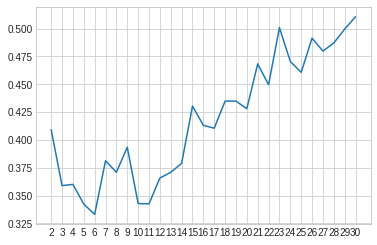

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# Other parameters related to training 
#lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)